# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

# Gather Data

[Source: Original research paper](http://lib.stat.cmu.edu/datasets/boston)

In [2]:
boston_dataset = load_boston()
type(boston_dataset)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

sklearn.utils.Bunch

In [3]:
#import pandas as pd
#import numpy as np
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#boston_dataset = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target = raw_df.values[1::2, 2]

In [4]:
#boston_dataset

In [5]:
dir(boston_dataset) #List of attributes

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data Points and Features

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
#Actual prices in thousands (000s)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration

In [11]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

#Add column with the price (target) to the Dataframe

data['PRICE'] = boston_dataset.target

In [12]:
data.tail() #The bottom rows

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - check for missing values

In [14]:
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing data 

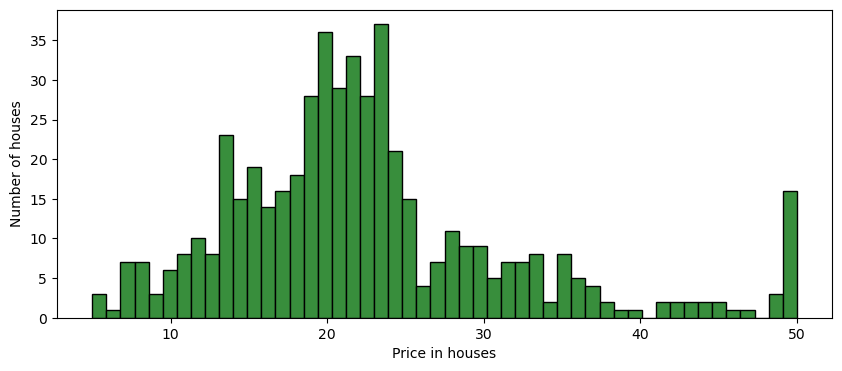

In [16]:
plt.figure(figsize = (10,4))
plt.hist(data['PRICE'], bins = 50, ec = 'black', color = '#388E3C') #ec es 'edgecolor'

plt.xlabel('Price in houses')
plt.ylabel('Number of houses')

plt.show()

<Figure size 1000x400 with 0 Axes>

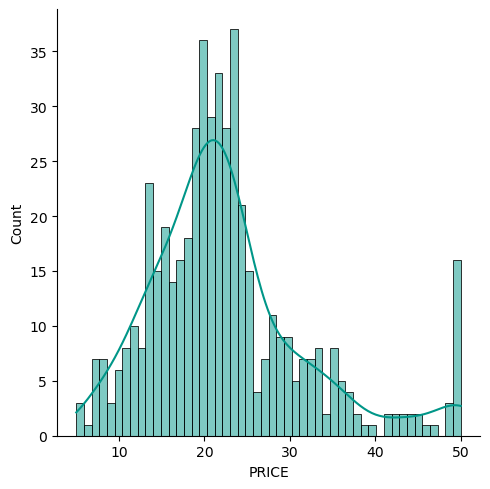

In [17]:
plt.figure(figsize = (10,4))
sns.displot(data['PRICE'], bins = 50, kde = True, color = '#009688')
plt.show()

<Figure size 1000x400 with 0 Axes>

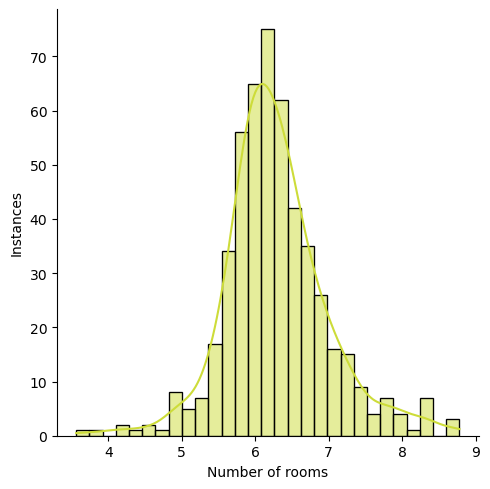

In [18]:
plt.figure(figsize = (10,4))
sns.displot(data['RM'], kde = True, color = '#CDDC39')
plt.xlabel('Number of rooms')
plt.ylabel('Instances')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351787

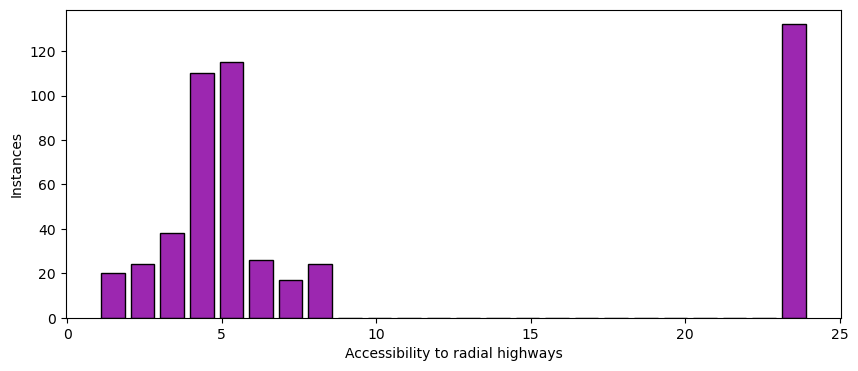

In [20]:
#Challenge: Create a meaningful histogram for RAD using matplotlib in royal purple
#RAD      index of accessibility to radial highways


plt.figure(figsize = (10,4))
plt.hist(data['RAD'], bins = 24, ec = 'black', color = '#9C27B0', align = 'mid', rwidth = 0.8)
plt.xlabel('Accessibility to radial highways')
plt.ylabel('Instances')

plt.show()

In [21]:
data['RAD'].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [22]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

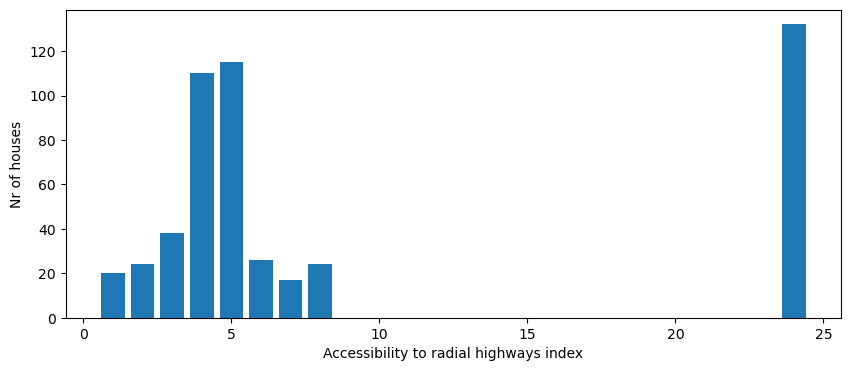

In [23]:
#BAR PLOT

frequency = data['RAD'].value_counts()

plt.figure(figsize = (10,4))
plt.bar(frequency.index, height = frequency)
plt.xlabel('Accessibility to radial highways index')
plt.ylabel('Nr of houses')
plt.show()


In [24]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [25]:
data.describe().transpose()

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
PRICE    506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
PRICE     25.000000   50.0000

## Correlation

## $$ \rho _{XY} = corr(X, Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [26]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [27]:
#Correlation between property prices and the pupil-teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

#### There is a moderate positive correlation between the housing price and the number of rooms, which is quite expected, houses with more rooms tend to be more expensive.

#### We find the inverse situation in respect to the association with the pupil-teacher ratio. As the values of P-T ratio go down, that means that each teacher gets to have in charge a greater amount of pupils. That usually translates in a worse educational experience (which I find a bit unjustified, as teaching has a an enormous influence of subjective experience). Nevertheless, house pricing lowers if the schools in the area tend to have more pupils for each teacher.

In [28]:
data.corr() #Pearson Correlation Coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [29]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

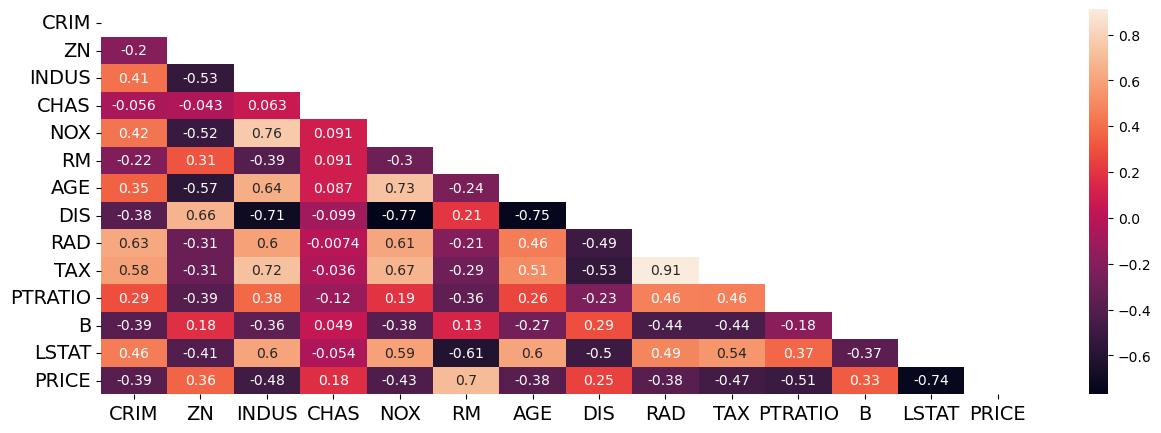

In [30]:
plt.figure(figsize = (15,5))

sns.heatmap(data.corr(), annot = True, annot_kws = {"size": 10}, mask = mask)
#sns.set_style()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

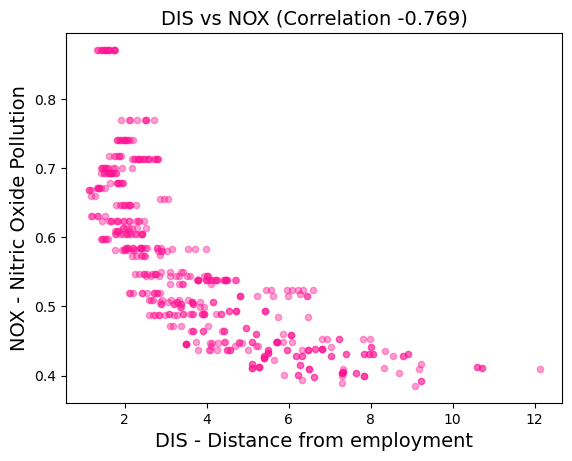

In [31]:
#Scatter plot between DIS and NOX

nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.scatter(x = data['DIS'], y = data['NOX'], alpha = 0.4, color = 'deeppink', s = 20)
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize = 14)
plt.xlabel('DIS - Distance from employment', fontsize = 14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize = 14)
plt.show()

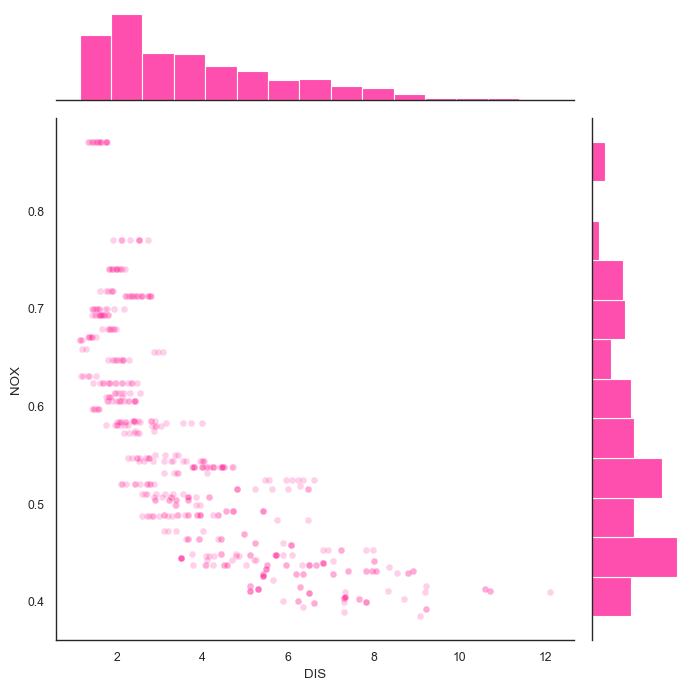

In [32]:
sns.set()
sns.set_context('paper')
sns.set_style('white')
sns.jointplot(x = data['DIS'], y = data['NOX'], height = 7, color = 'deeppink', joint_kws = {'alpha': 0.2})
plt.show()

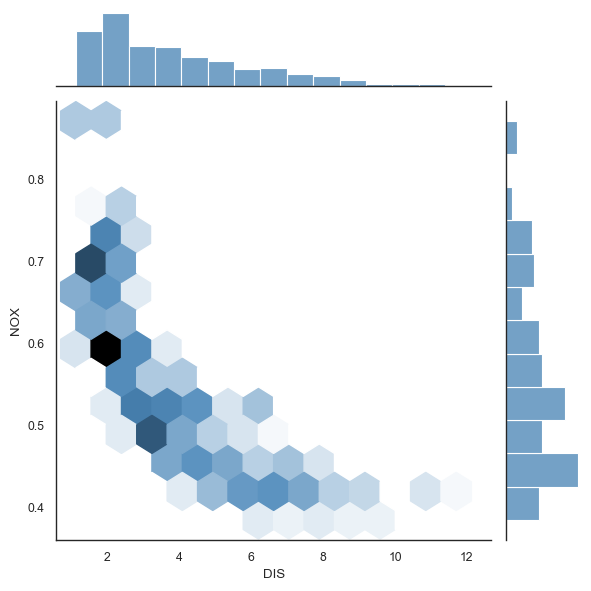

In [33]:
sns.set()
sns.set_context('paper')
sns.set_style('white')
sns.jointplot(x = data['DIS'], y = data['NOX'], kind = 'hex', height = 6, color = 'steelblue')
plt.show()

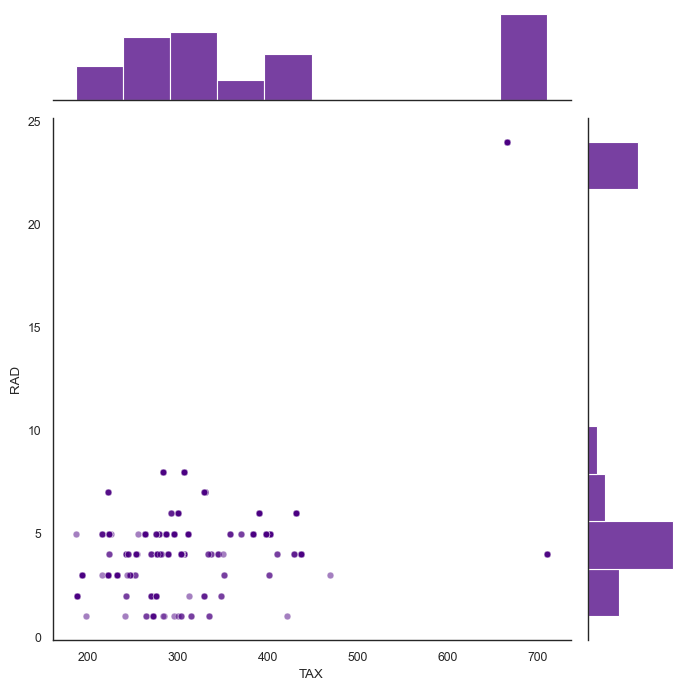

In [34]:
sns.set()
sns.set_context('paper')
sns.set_style('white')
sns.jointplot(x = data['TAX'], y = data['RAD'], height = 7, color = 'indigo', joint_kws = {'alpha': 0.5})
plt.show()

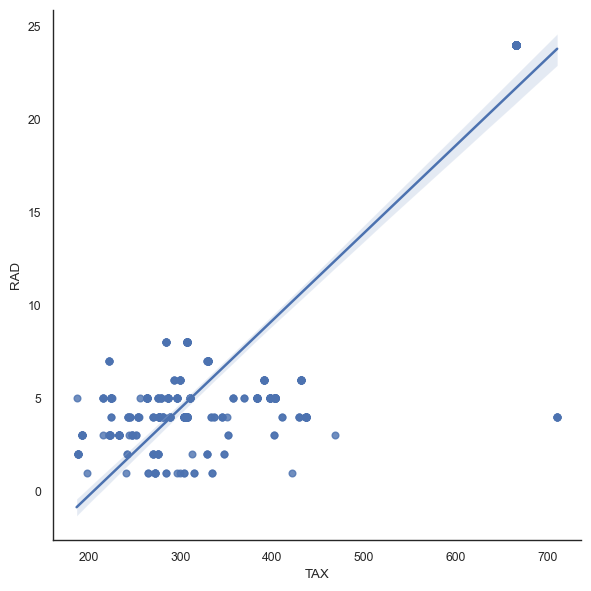

In [35]:
sns.lmplot(x = 'TAX', y = 'RAD', data = data,  height = 6)

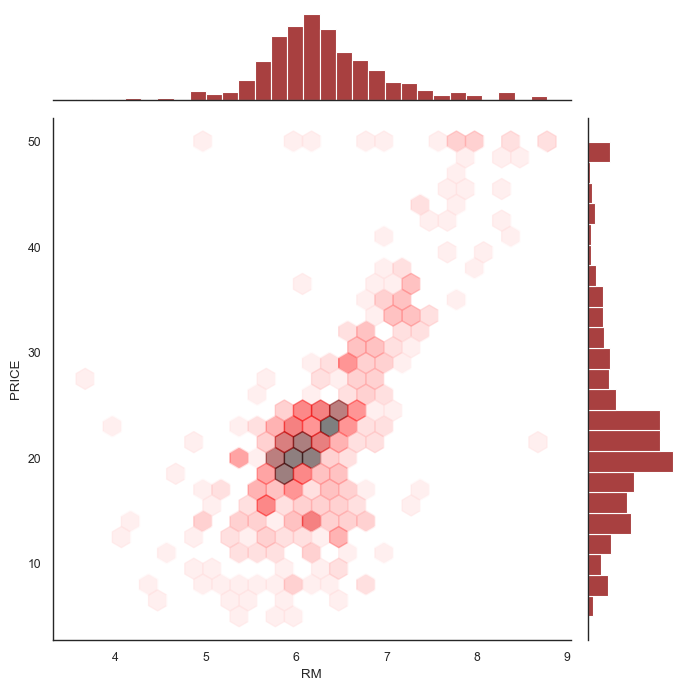

In [36]:
#Scatter plot between the house prices and the number of rooms (RM)

sns.set()
sns.set_context('paper')
sns.set_style('white')
sns.jointplot(x = data['RM'], y = data['PRICE'], height = 7, color = 'darkred', joint_kws = {'alpha': 0.5}, kind = 'hex')
plt.show()

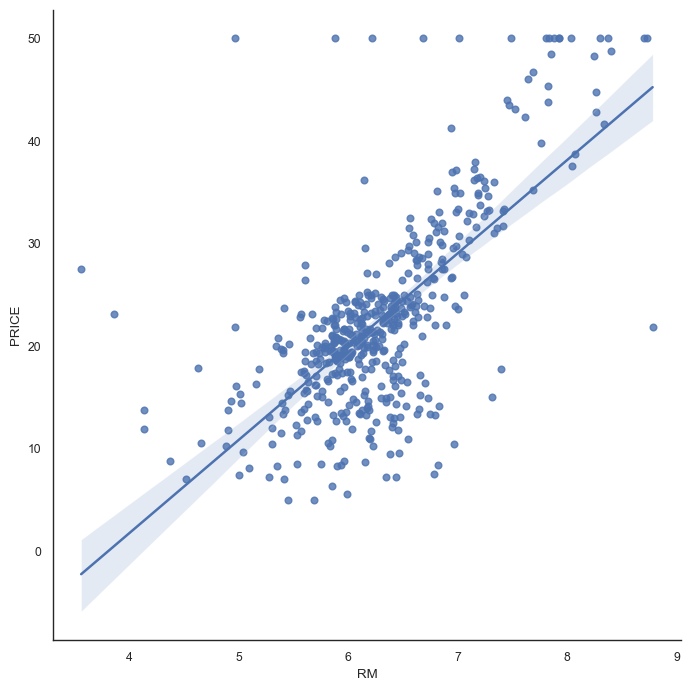

In [37]:
sns.lmplot(x = 'RM', y = 'PRICE', data = data,  height = 7)
plt.show()

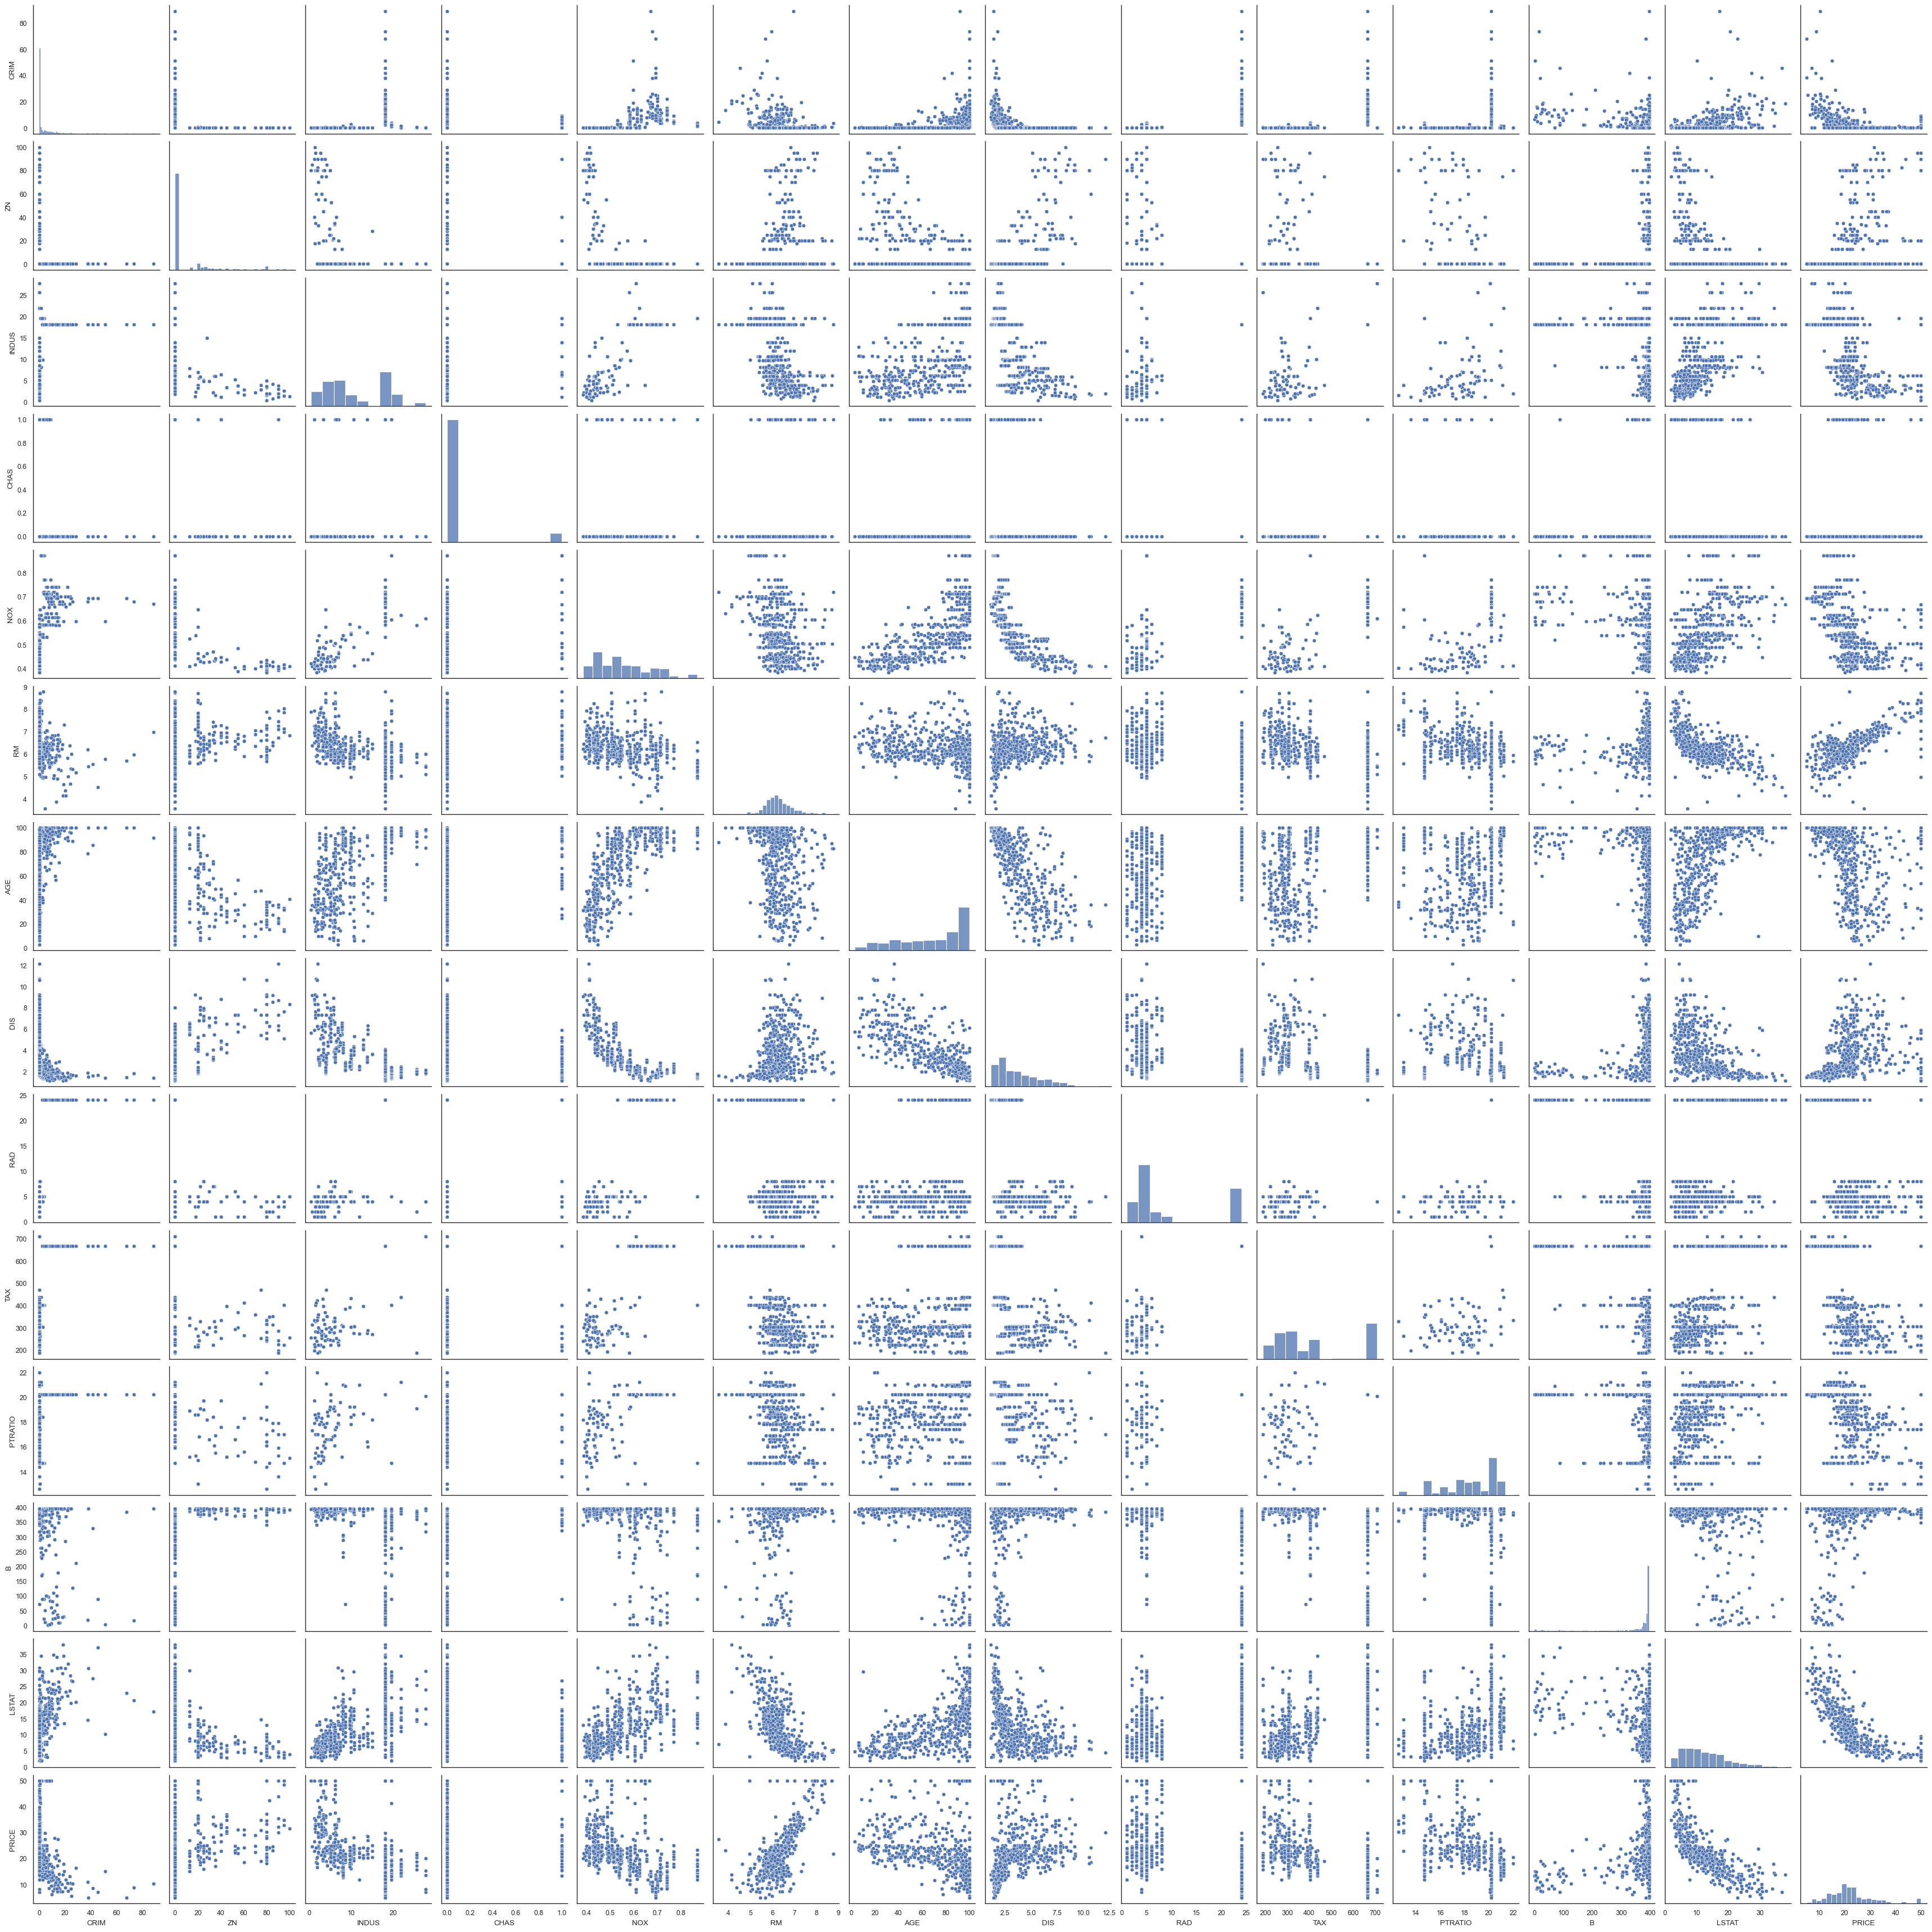

Wall time: 46 s


In [38]:
%%time

sns.pairplot(data)
plt.show()

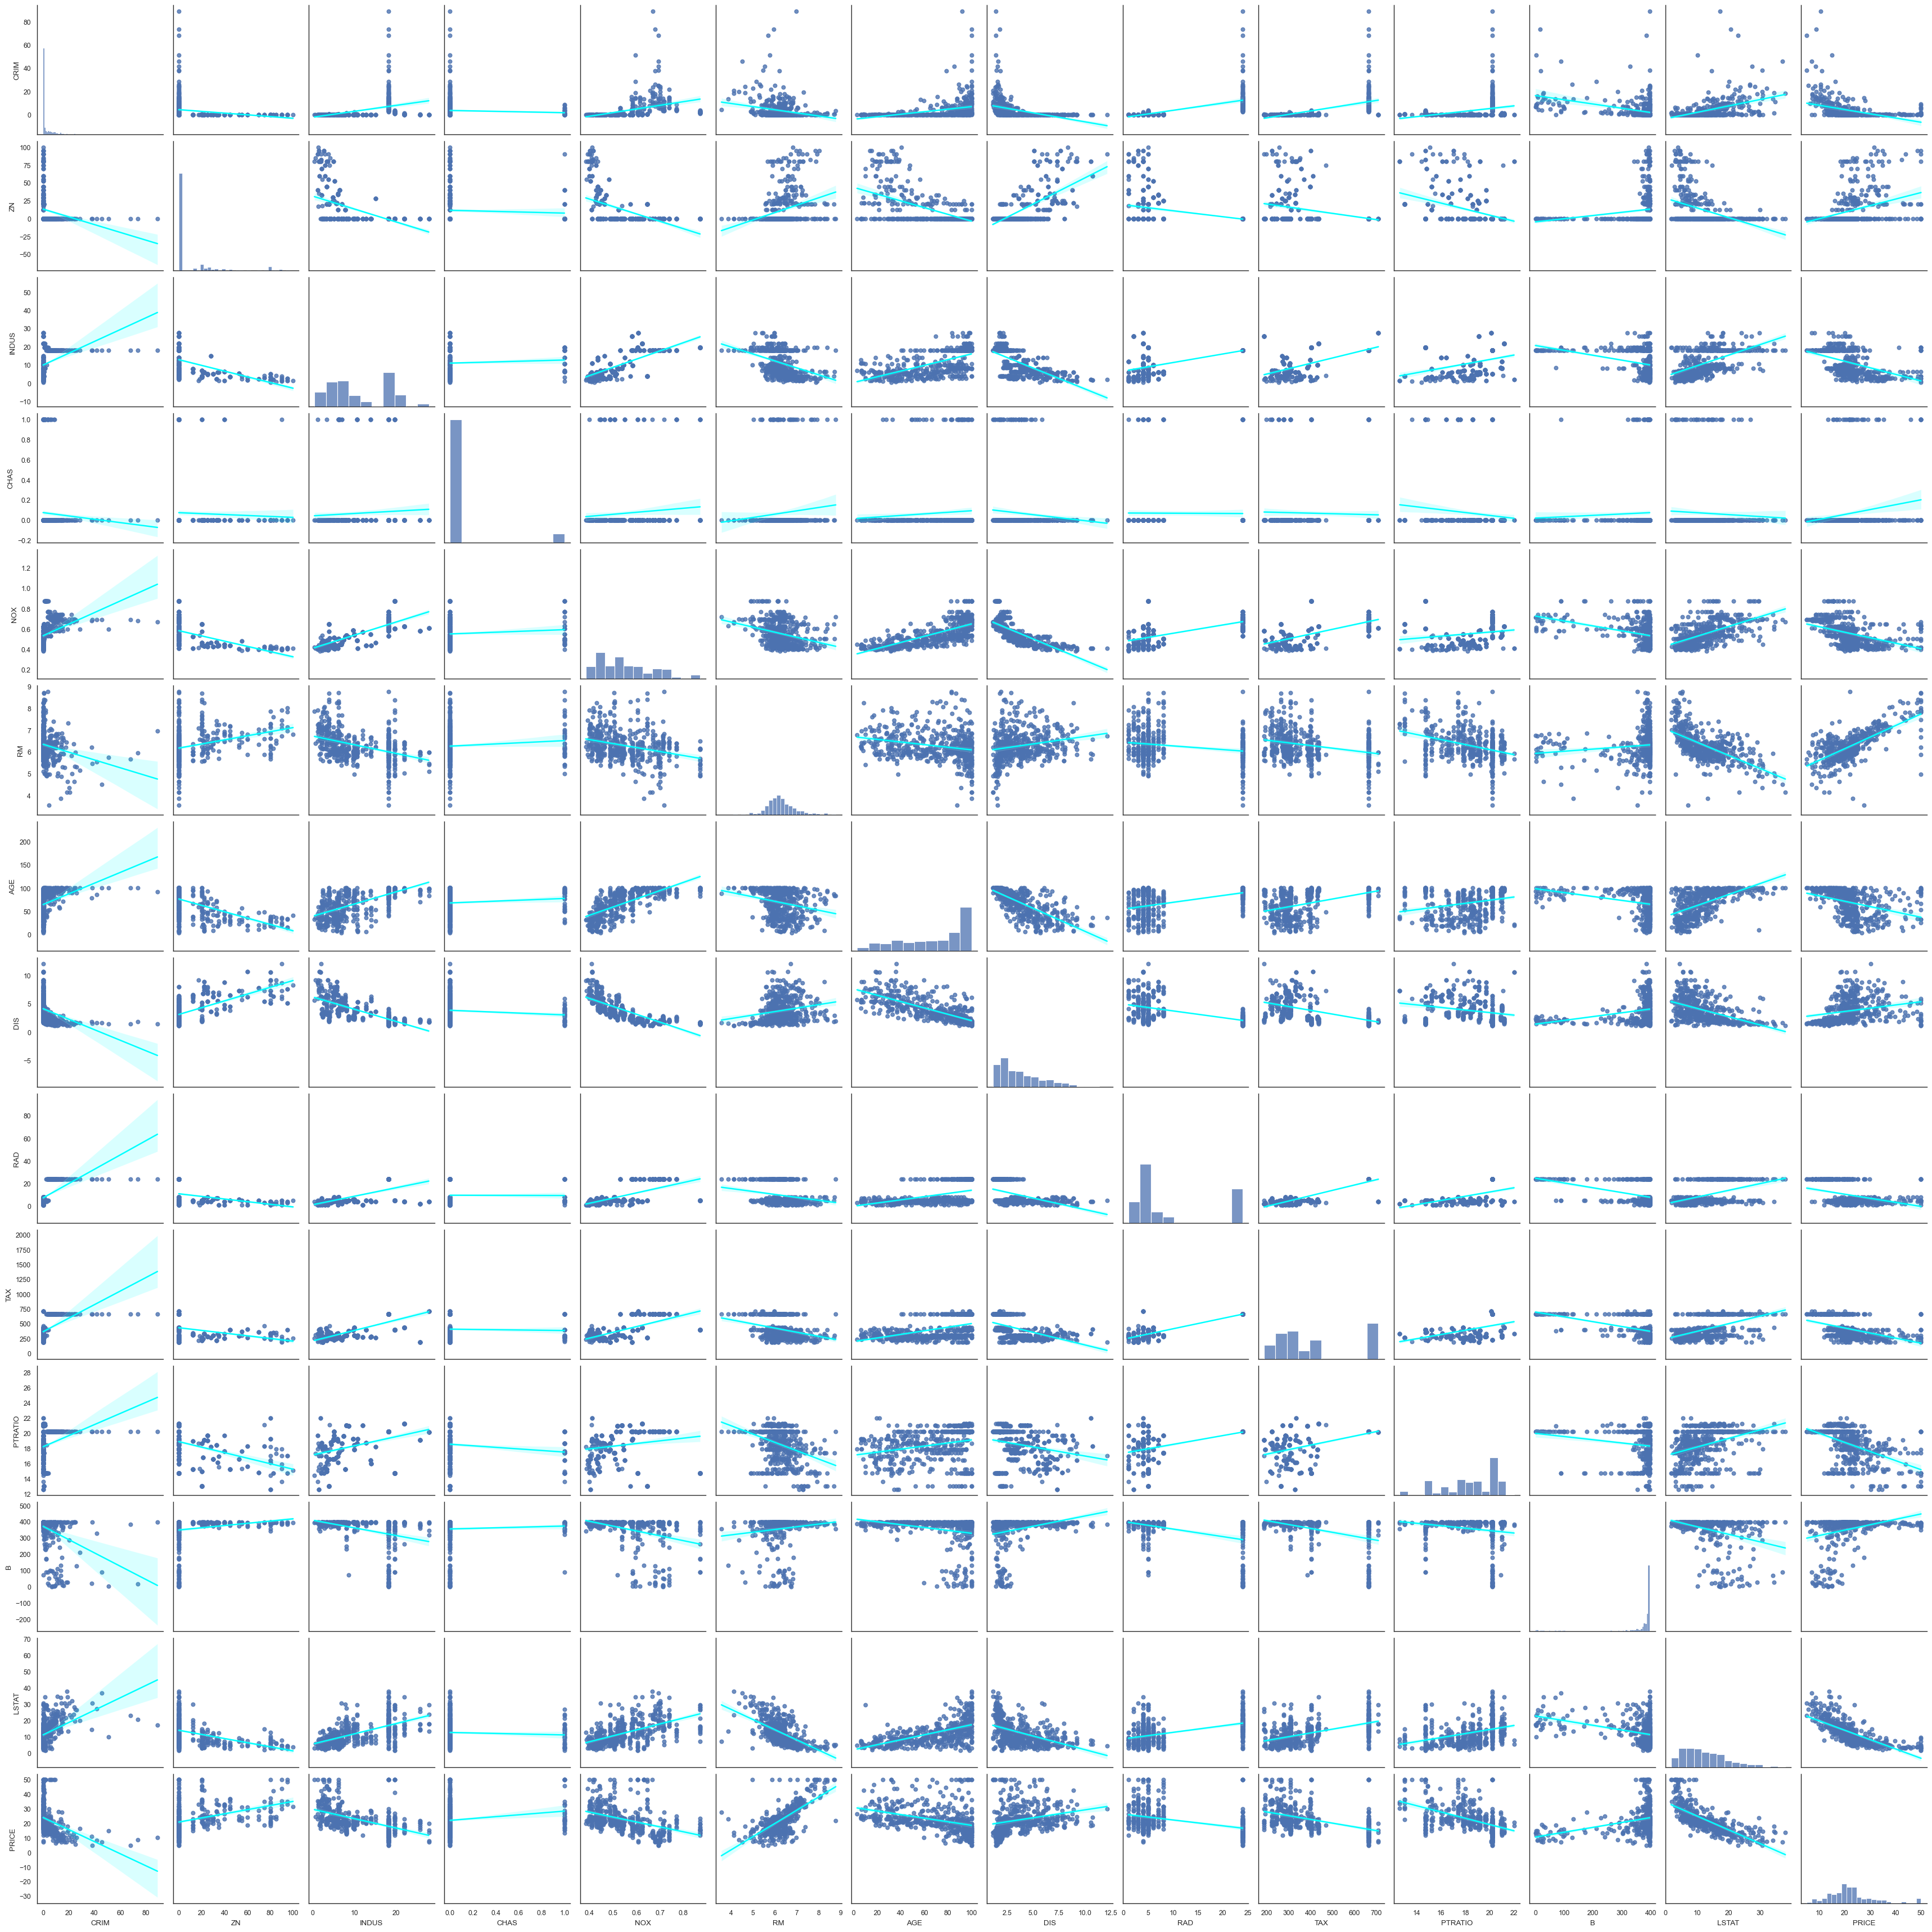

Wall time: 1min 42s


In [39]:
%%time

sns.pairplot(data, kind = 'reg', plot_kws = {'line_kws': {'color': 'cyan'}})
plt.show()

# Multivariable Regression

## Training & Test Dataset Split

In [40]:
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2,
                                                   random_state = 10) #random_state nos permite emular la division de data,
#siempre que se elija el mismo numero


# % of training set
len(X_train)/len(features)

0.7984189723320159

In [41]:
# % of test data set

X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [42]:
regr = LinearRegression()

#Training our model

regr.fit(X_train, y_train)


#R-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))
#La performance del modelo con data que nunca habia visto (test) tiene sentido que sea mas baja que con la data de train
#Correr el modelo con datos nuevos nos da la idea de su poder predictivo



print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['Coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


Coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Data Transformations

In [43]:
#Cuando tenemos muchos valores sobre el extremo derecho y/o izquierdo de nuestra distribucion, en ingles se le llama SKEW.
#En una distribucion normal el valor de Skew = 0. Si esta a la derecha el skew = +x

data['PRICE'].skew()
#En el caso de nuestra distribucion de precios, tiene un skew = 1.1, es decir, tiene varios valores en el extremo derecho

1.1080984082549072

#### Our price distribution has a skew that tends to the right

### _Log Transformation_

In [44]:
#Transformar los datos (antes de la regresion) puede minimizar el skew

y_log = np.log(data['PRICE'])
y_log.head(3)

0    3.178054
1    3.072693
2    3.546740
Name: PRICE, dtype: float64

In [45]:
y_log.skew()

-0.33032129530987864

#### Skew has now been minimized using log transformation on our Price feature

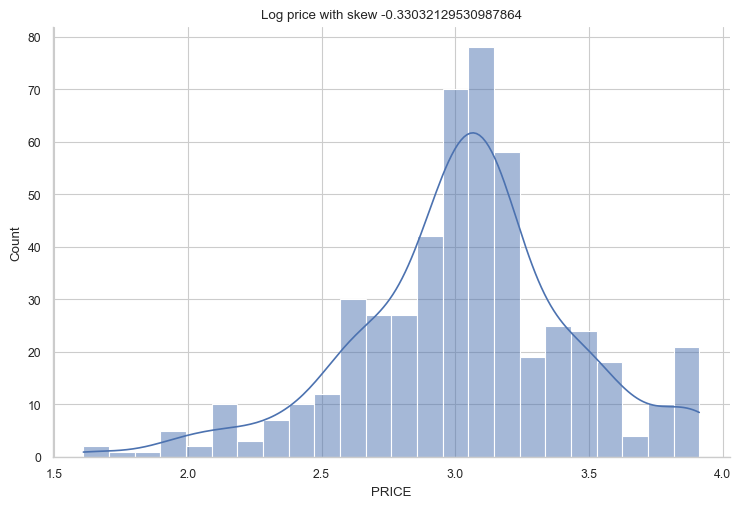

In [46]:
sns.set_context('paper')
sns.set_style('whitegrid')

sns.displot(y_log, kde = True, aspect = 1.5)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()
          

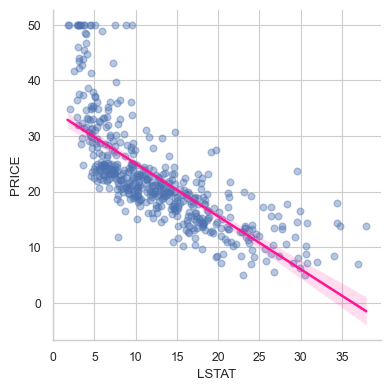

In [47]:
sns.lmplot(x = 'LSTAT', y = 'PRICE', data = data, height = 4, 
           scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'deeppink'})

plt.show()

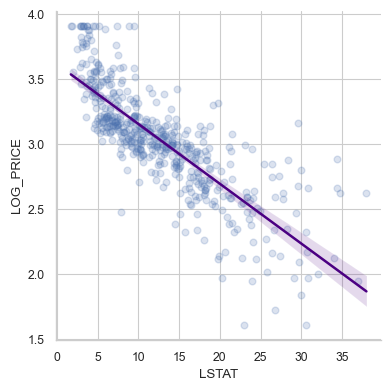

In [48]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x = 'LSTAT', y = 'LOG_PRICE', data = transformed_data, height = 4, 
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'indigo'})

plt.show()

## Regression using log prices

In [49]:
prices = np.log(data['PRICE']) #Use log prices
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2,
                                                   random_state = 10) 


regr = LinearRegression()
regr.fit(X_train, y_train)


print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['Coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


Coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390


#### By means of data log transformation applied on Price feature, our multivariable regression showed a better performance

In [50]:
#Charles River Property Premium

round(np.e**0.080331, 2)

1.08

## p-values & Evaluating Coefficients

In [51]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12} LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [52]:
variance_inflation_factor(exog = X_incl_const.values, exog_idx = 1)

1.7145250443932485

In [53]:
X_incl_const.shape[1]

14

In [54]:
for i in range(X_incl_const.shape[1]):
    print(round(variance_inflation_factor(exog = X_incl_const.values, exog_idx = i), 2))

597.55
1.71
2.33
3.94
1.08
4.41
1.84
3.33
4.22
7.31
8.51
1.84
1.34
2.81


In [55]:
vif = [] #empty list

for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog = X_incl_const.values, exog_idx = i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [56]:
#otra manera de hacer el mismo loop

vif = [variance_inflation_factor(exog = X_incl_const.values, 
                                 exog_idx = i) for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

#### Generalmente el valor umbral de VIF para decidir si un feature tiene multicolinearidad es vif > 10, pero algunos usan vif>5.

#### En este caso usamos 10, porque los valores previos nos daban bien. Entonces no parece haber multicolinearidad en nuestras features

## Model Simplification & Bayesian Information Criterion (BIC)

### Measuring complexity

#### Allows to compare two different models. If $BIC_{M1}$ values are lower than $BIC_{M2}$ values, then $M_1$ is considered a better model.

In [57]:
#Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC1:', results.bic) 
print('R-squared1:', results.rsquared)

BIC1: -139.74997769478875
R-squared1: 0.7930234826697582


In [58]:
#Reduced model1 excluding INDUS feature

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis = 1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC2:', results.bic) 
print('R-squared2:', results.rsquared)

BIC2: -145.14508855591163
R-squared2: 0.7927126289415163


#### When extracting 'INDUS' feature the $BIC_{M2}$ is lower and $R_2$ value remains practically the same. Next, I try the model extracting 'AGE' feature.

In [59]:
#Reduced model2 excluding AGE feature

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis = 1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_age = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC3:', results.bic) 
print('R-squared3:', results.rsquared)

BIC3: -149.49934294224656
R-squared3: 0.7918657661852815


#### Now we can see that $BIC_{M3}$ value is even lower than before and $R_2$ still remains practically the same. 

In [60]:
frames = [org_coef, coef_minus_indus, coef_minus_age]
pd.concat(frames, axis = 1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals & Residual Plots

- Difference btw the target value and the predicted value
- Used to check if assumptions hold and model is valid
- Residuals should be random (i.e., no pattern)
- Residuals should be normally distributed


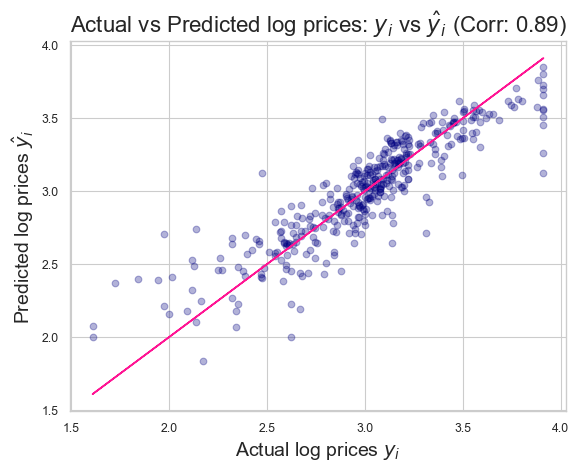

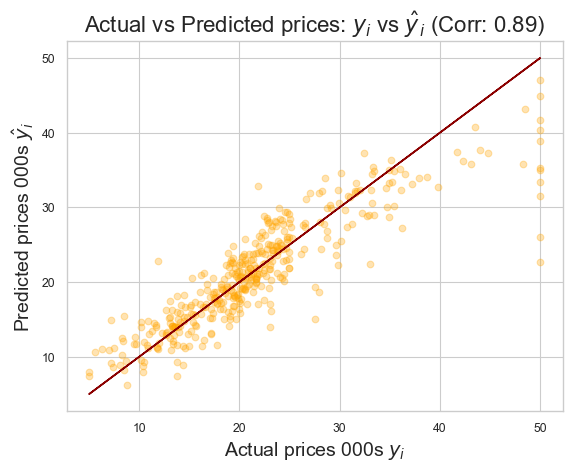

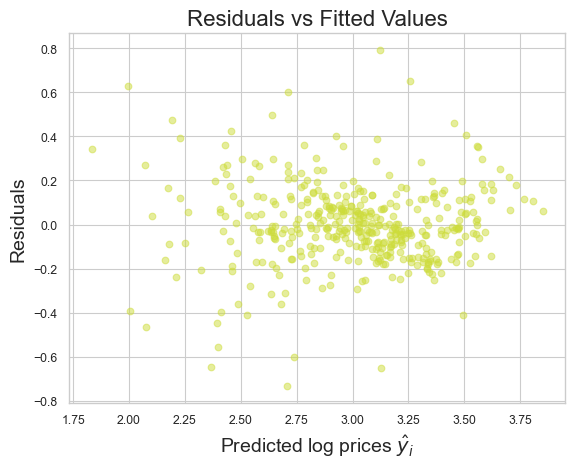

In [61]:
#Modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data['PRICE']) #Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2,
                                                   random_state = 10) 


#Using Statsmodel

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Residuals

#residuals = y_train - results.fittedvalues
#results.resid


#Graph of Actual vs Predicted Prices

corr = round(y_train.corr(results.fittedvalues), 2) #Para ver la correlacion entre lo observado y lo predicho

plt.scatter(x = y_train, y = results.fittedvalues, color = 'navy', alpha = 0.3)
plt.plot(y_train, y_train, color = 'deeppink')

plt.xlabel('Actual log prices $y _i$', fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y _i$ (Corr: {corr})', fontsize = 16)

plt.show()

#Lo mismo pero con los precios nuevamente sin log, retransformados:

plt.scatter(x = np.e**y_train, y = np.e**results.fittedvalues, color = 'orange', alpha = 0.3)
plt.plot(np.e**y_train, np.e**y_train, color = 'darkred')

plt.xlabel('Actual prices 000s $y _i$', fontsize = 14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y _i$ (Corr: {corr})', fontsize = 16)

plt.show()


#Residuals vs Predicted Values

plt.scatter(x = results.fittedvalues, y = results.resid, color = '#CDDC39', alpha = 0.5)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)
plt.title('Residuals vs Fitted Values', fontsize = 16)

plt.show()


#Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [62]:
#Distribution of Residuals (log prices) - Checking for normality

print('Residuals mean is:', round(results.resid.mean(), 3))
print('Residuals skew value is:', round(results.resid.skew(),3))

Residuals mean is: -0.0
Residuals skew value is: 0.118


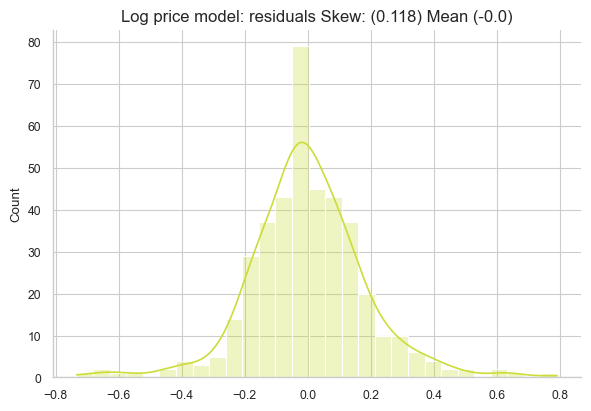

In [63]:
resid_skew = round(results.resid.skew(),3)
resid_mean = round(results.resid.mean(), 3)

sns.displot(results.resid, kde = True, color = '#CDDC39', height = 4, aspect = 1.5, alpha = 0.3)
plt.title(f'Log price model: residuals Skew: ({resid_skew}) Mean ({resid_mean})', fontsize = 12)
plt.show()

In [64]:
#Challenge: Using the original model with all the features and normal prices generate:
#Plot of actual vs predicted prices (incl.correlation) using a different color
#Plot of residuals vs predicted prices
#Plot of distribution of residuals (incl. skew)
#Analyze the results

In [65]:
#Original model - All features and normal price

prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2,
                                                   random_state = 10) 

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
#model = sm.OLS(y_train, X_train)
results = model.fit()

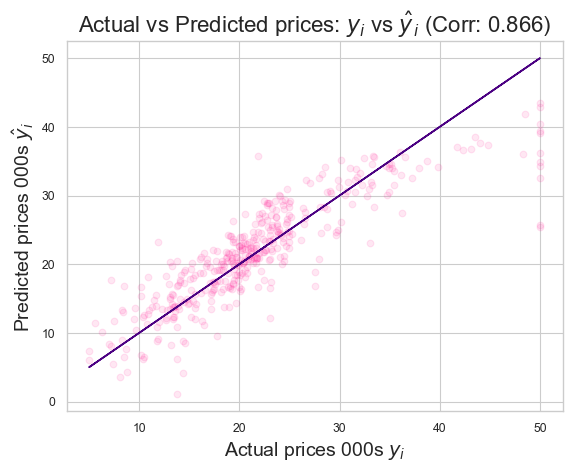

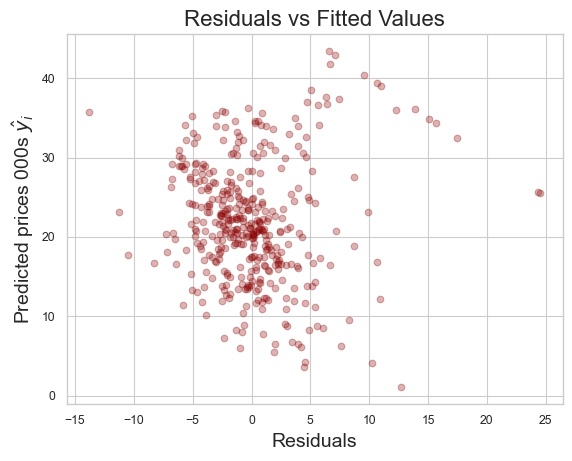

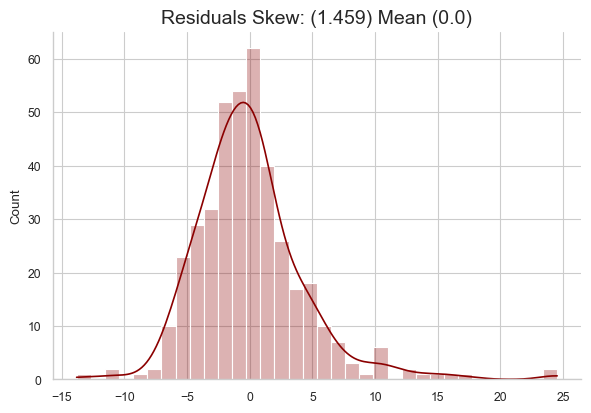

In [66]:
residuals = results.resid
corr = round(y_train.corr(results.fittedvalues), 3)

#actual vs predicted prices (incl.correlation) using a different color

plt.scatter(x = y_train, y = results.fittedvalues, color = 'deeppink', alpha = 0.1)
plt.plot(y_train, y_train, color = 'indigo')

plt.xlabel('Actual prices 000s $y _i$', fontsize = 14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y _i$ (Corr: {corr})', fontsize = 16)

plt.show()

#Residuals vs Predicted Values

plt.scatter(x = results.resid, y = results.fittedvalues, color = 'darkred', alpha = 0.3)

plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize = 14)
plt.title('Residuals vs Fitted Values', fontsize = 16)

plt.show()

resid_skew = round(results.resid.skew(),3)
resid_mean = round(results.resid.mean(), 3)

sns.displot(results.resid, kde = True, color = 'darkred', height = 4, aspect = 1.5, alpha = 0.3)
plt.title(f'Residuals Skew: ({resid_skew}) Mean ({resid_mean})', fontsize = 14)
plt.show()

#Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

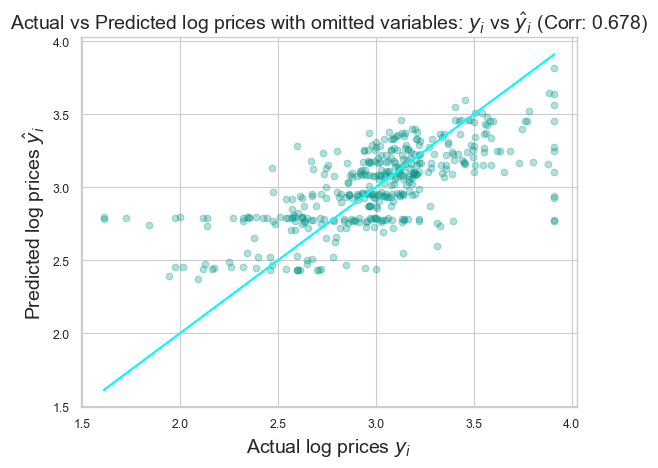

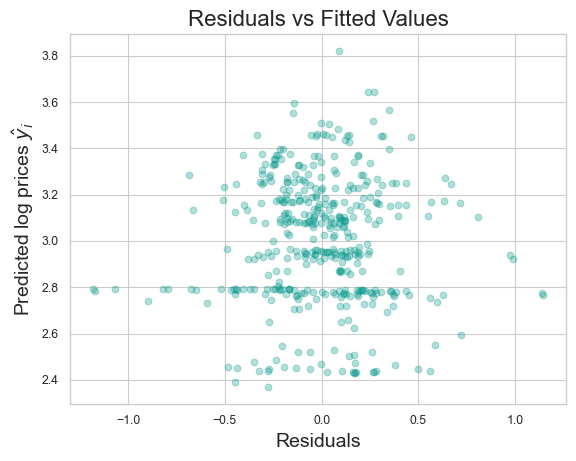

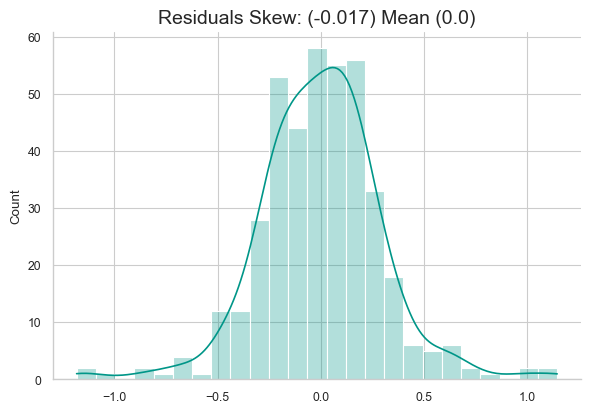

In [67]:
#Como se ve la distribucion de los residuos si sacamos features importantes

#Model omitting key features using log prices

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2,
                                                   random_state = 10) 

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
#model = sm.OLS(y_train, X_train)
results = model.fit()

residuals = results.resid
corr = round(y_train.corr(results.fittedvalues), 3)

#actual vs predicted prices (incl.correlation) using a different color

plt.scatter(x = y_train, y = results.fittedvalues, color = '#009688', alpha = 0.3)
plt.plot(y_train, y_train, color = 'cyan')

plt.xlabel('Actual log prices $y _i$', fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs Predicted log prices with omitted variables: $y_i$ vs $\hat y _i$ (Corr: {corr})', fontsize = 14)

plt.show()

#Residuals vs Predicted Values

plt.scatter(x = results.resid, y = results.fittedvalues, color = '#009688', alpha = 0.3)

plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.title('Residuals vs Fitted Values', fontsize = 16)

plt.show()

resid_skew = round(results.resid.skew(),3)
resid_mean = round(results.resid.mean(), 3)

sns.displot(results.resid, kde = True, color = '#009688', height = 4, aspect = 1.5, alpha = 0.3)
plt.title(f'Residuals Skew: ({resid_skew}) Mean ({resid_mean})', fontsize = 14)

plt.show()


#Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [68]:
pd.DataFrame({'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
              'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse]),
             'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared]},  
             index = ['Reduced Log Model', 'Full Normal Price Model', 'Omitted Variables Model'])

MSE      RMSE  R-Squared
Reduced Log Model         0.035  0.187083      0.792
Full Normal Price Model  19.921  4.463295      0.750
Omitted Variables Model   0.090  0.300000      0.460

In [69]:
#R-squared no tiene unidades
#MSE si tiene unidades, la unidad de la target feature (en nuestro caso es log 000s dolares o 000s dolares)

### RMSE - Root Mean Square Error
#### La raiz cuadrada de MSE
#### Representa un desvio estandar de las diferencias entre los valores reales y los predichos. Es decir, representa a un desvio estandar en la distribucion de los residuos.

#### Esto significa que si yo quiero calcular el INTERVALO DE PREDICCION que abarque +/- $2\sigma$ (95%), entonces al valor predicho le sumo o resto dos veces el RMSE 

In [70]:
#Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound for a 95% prediction interval
#using the reduced log model

upper = np.log(30) + 2 * np.sqrt(reduced_log_mse)
lower = np.log(30) - 2 * np.sqrt(reduced_log_mse)
print('Upper 95% bound:', round(upper, 2))
print('Upper 95% bound in normal prices:', round(np.e**(upper)*1000,2))
print('Lower 95% bound:', round(lower, 2))
print('Lower 95% bound in normal prices:', round(np.e**(lower)*1000,2))

Upper 95% bound: 3.78
Upper 95% bound in normal prices: 43613.34
Lower 95% bound: 3.03
Lower 95% bound in normal prices: 20635.89
